In [102]:
#Importing all relevant libraries.

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Importing in the data to use

df = pd.read_csv(r'C:\Users\dansi\OneDrive\Documents\SQL_Project\movies.csv', encoding= 'unicode_escape')

In [103]:
#Checking the data has imported correctly by printing the initial header of the data.
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [104]:
#Checking for potential missing data within the set.

for col in df.columns:
    missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [105]:
#Changes the data type of the defined column into integers.

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [106]:
#Creates a columns for the correct year of release as there are discrepancies within the data set for the year of release.
df['year_correct'] = df['released'].astype(str).str[:4]

In [107]:
df= df.sort_values(by=['gross'], inplace = False, ascending = False)

<function matplotlib.pyplot.show(*args, **kw)>

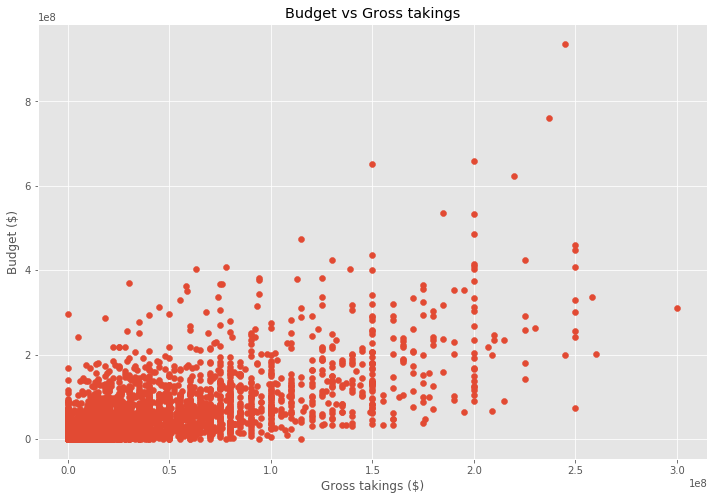

In [108]:
#Basic comparison plot for budget vs gross takings per realease.

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross takings')
plt.xlabel('Gross takings ($)')
plt.ylabel('Budget ($)')
plt.show

Text(0.5, 1.0, 'Budget vs Gross takings')

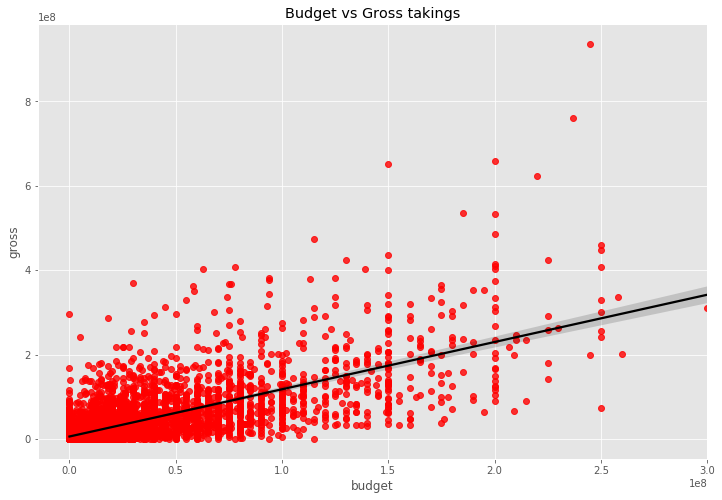

In [109]:
#Using seaborn in place of matplot
sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color": "red"}, 
            line_kws={"color":"black"}).set_title('Budget vs Gross takings')

#The rough linear correlation line is included within this plot by default and is therefore a useful tool for quick analysis of
#basic data plots.

In [110]:
df.corr(method='pearson')  #There are a number of different correlation methods built in, e.g. Pearson, Spearman, Kendall...
#They are all different methods and therefore produce marginally different results

#From this result it can be seen that there is a strong correlation betweesn budget and gross takings on average per film.

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


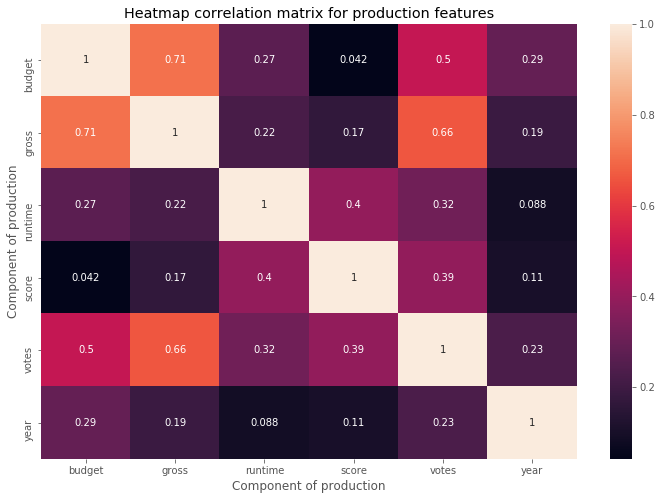

In [111]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Heatmap correlation matrix for production features')
plt.xlabel('Component of production')
plt.ylabel('Component of production')

plt.show()

In [112]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,0.095504,-0.028062,0.080628,0.119652,0.115788,0.117957,0.101400,0.059645,0.040488,0.004604,0.077698,0.119393,0.075271,-0.002140,0.013504
company,0.095504,1.000000,0.344712,0.647567,0.070490,0.714419,0.702854,0.377810,0.313695,0.007934,-0.036872,0.580693,0.691879,0.645280,0.033326,0.030440
country,-0.028062,0.344712,1.000000,0.277133,-0.024093,0.279401,0.275837,0.241951,0.107884,0.028241,-0.164288,0.288864,0.266566,0.287553,-0.052244,0.018448
director,0.080628,0.647567,0.277133,1.000000,0.072156,0.756448,0.743649,0.334472,0.376711,0.015257,0.050784,0.593229,0.743359,0.724076,0.094323,0.030337
genre,0.119652,0.070490,-0.024093,0.072156,1.000000,0.101394,0.102866,0.097025,0.073920,-0.003693,0.027134,0.083625,0.102707,0.072177,0.040547,0.031626
gross,0.115788,0.714419,0.279401,0.756448,0.101394,1.000000,0.985850,0.411240,0.476354,0.014827,0.037916,0.657912,0.981340,0.817174,0.113675,0.033208
name,0.117957,0.702854,0.275837,0.743649,0.102866,0.985850,1.000000,0.405936,0.470290,0.015281,0.038703,0.648663,0.968189,0.808108,0.108869,0.034861
rating,0.101400,0.377810,0.241951,0.334472,0.097025,0.411240,0.405936,1.000000,0.200424,0.047989,-0.121917,0.361834,0.399032,0.358276,0.025147,0.013365
released,0.059645,0.313695,0.107884,0.376711,0.073920,0.476354,0.470290,0.200424,1.000000,0.004341,0.078252,0.346635,0.472551,0.404891,0.242076,0.061341
runtime,0.040488,0.007934,0.028241,0.015257,-0.003693,0.014827,0.015281,0.047989,0.004341,1.000000,-0.022387,0.027886,0.014370,0.000426,0.000274,0.023217


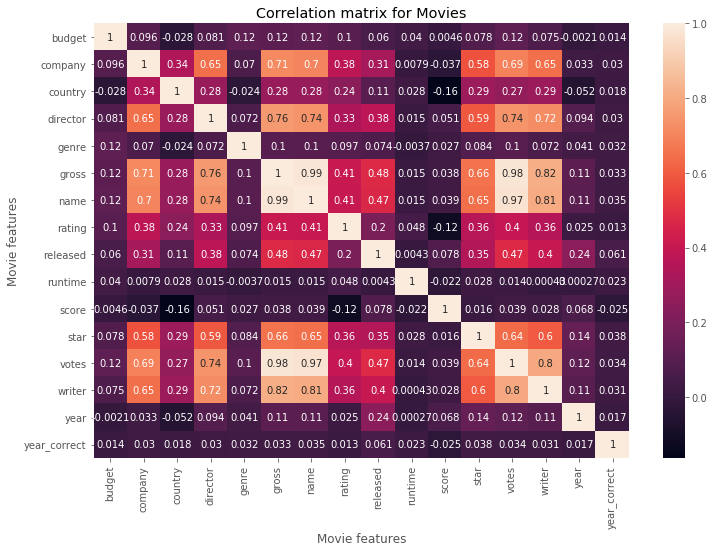

In [113]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [114]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()
print(corr_pairs)

budget        budget          1.000000
              company         0.095504
              country        -0.028062
              director        0.080628
              genre           0.119652
                                ...   
year_correct  star            0.037712
              votes           0.034135
              writer          0.031098
              year            0.016875
              year_correct    1.000000
Length: 256, dtype: float64


In [115]:
#These pairs can be sorted using an array of alogrithms within pandas

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)


score         country        -0.164288
country       score          -0.164288
rating        score          -0.121917
score         rating         -0.121917
country       year           -0.052244
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64


In [116]:
#These pairs can also be sorted according to the strength of their correlation, i.e. a strong correlation of (> 0.7)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]

print(strong_pairs)

company       name            0.702854
name          company         0.702854
company       gross           0.714419
gross         company         0.714419
director      writer          0.724076
writer        director        0.724076
votes         director        0.743359
director      votes           0.743359
              name            0.743649
name          director        0.743649
gross         director        0.756448
director      gross           0.756448
votes         writer          0.799380
writer        votes           0.799380
name          writer          0.808108
writer        name            0.808108
gross         writer          0.817174
writer        gross           0.817174
votes         name            0.968189
name          votes           0.968189
gross         votes           0.981340
votes         gross           0.981340
gross         name            0.985850
name          gross           0.985850
budget        budget          1.000000
writer        writer     